## me ubico en el directorio

In [3]:
import os

In [4]:
carpetaActual   = os.getcwd()
print(carpetaActual)


/Users/maxiabdala/Documents/python/series _temporales maxi/trabajo final


## Extraccion del audio de los dos videos

In [7]:
from moviepy.editor import VideoFileClip

# Ruta al archivo de video
videoPath1 = 'video1.mp4'
videoPath2 = 'video2.mp4'
# Cargar el video
video1 = VideoFileClip(videoPath1)
video2 = VideoFileClip(videoPath2)

# Extraer el audio
audio1 = video1.audio
audio2 = video2.audio

# Guardar el audio en un archivo
audioPath1 = 'audio1.mp3'
audioPath2 = 'audio2.mp3'
audio1.write_audiofile(audioPath1, codec='mp3')
audio2.write_audiofile(audioPath2, codec='mp3')


MoviePy - Writing audio in audio1.mp3


MoviePy - Done.
MoviePy - Writing audio in audio2.mp3


MoviePy - Done.


## Utilizo la libreria librosa para extraer caracteristicas de los audio y poder graficarlas para realizar un analsis mas visual

In [8]:
import librosa
import matplotlib.pyplot as plt

# Definir una función para cargar y extraer características de un archivo de audio
def extract_features(audio_path):
    # Cargar el archivo de audio
    y, sr = librosa.load(audio_path, sr=None)

    # Extraer características
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    chromagram = librosa.feature.chroma_stft(y=y, sr=sr)
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
    tempogram = librosa.feature.tempogram(y=y, sr=sr)
    rms = librosa.feature.rms(y=y)
    zcr = librosa.feature.zero_crossing_rate(y)
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)

    return mfccs, chromagram, tonnetz, tempogram, rms, zcr, spectral_centroids, spectral_rolloff, spectral_bandwidth

# Rutas a los archivos de audio
audio_paths = ["audio1.mp3", "audio2.mp3"]

# Lista para almacenar las características de cada archivo de audio
features_list = []

# Iterar sobre los archivos de audio y extraer características
for audio_path in audio_paths:
    mfccs, chromagram, tonnetz, tempogram, rms, zcr, spectral_centroids, spectral_rolloff, spectral_bandwidth = extract_features(audio_path)
    features_list.append((mfccs, chromagram, tonnetz, tempogram, rms, zcr, spectral_centroids, spectral_rolloff, spectral_bandwidth))

# Imprimir los shapes de las características extraídas
for i, features in enumerate(features_list):
    print(f"Archivo de audio {i+1}:")
    for feature in features:
        print(f"   Shape: {feature.shape}")



Archivo de audio 1:
   Shape: (13, 10762)
   Shape: (12, 10762)
   Shape: (6, 10762)
   Shape: (384, 10762)
   Shape: (1, 10762)
   Shape: (1, 10762)
   Shape: (1, 10762)
   Shape: (1, 10762)
   Shape: (1, 10762)
Archivo de audio 2:
   Shape: (13, 11187)
   Shape: (12, 11187)
   Shape: (6, 11187)
   Shape: (384, 11187)
   Shape: (1, 11187)
   Shape: (1, 11187)
   Shape: (1, 11187)
   Shape: (1, 11187)
   Shape: (1, 11187)


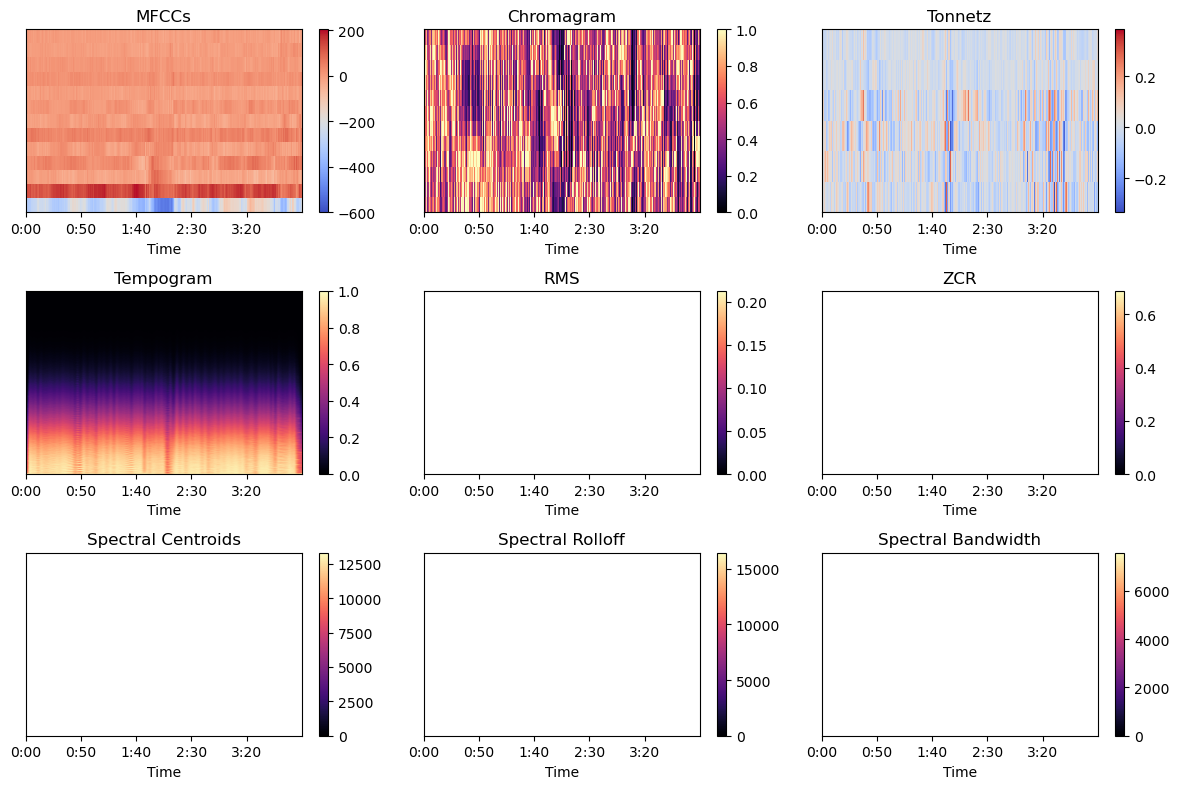

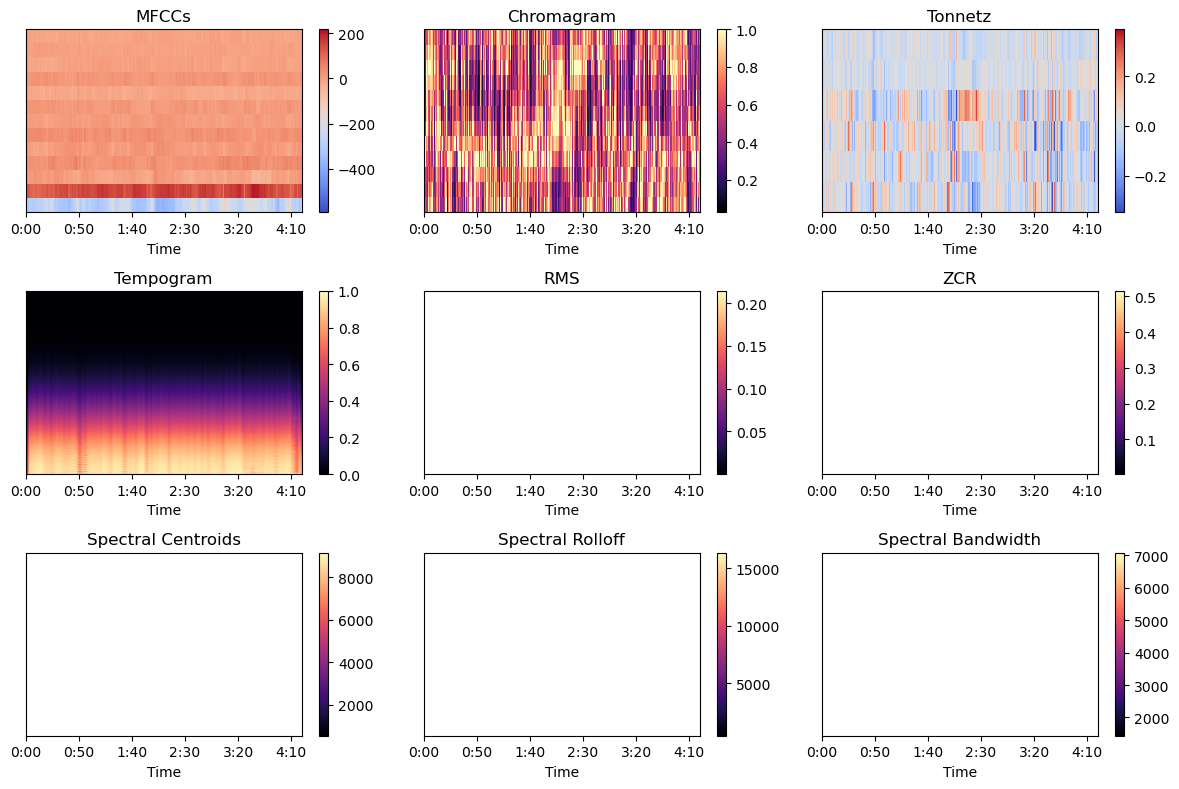

In [9]:
# Función para graficar características
def plot_features(features_list):
    feature_names = ["MFCCs", "Chromagram", "Tonnetz", "Tempogram", "RMS", "ZCR", "Spectral Centroids", "Spectral Rolloff", "Spectral Bandwidth"]
    
    for i, features in enumerate(features_list):
        plt.figure(figsize=(12, 8))
        for j, feature in enumerate(features):
            plt.subplot(3, 3, j+1)
            librosa.display.specshow(feature, x_axis='time')
            plt.colorbar()
            plt.title(feature_names[j])
        plt.tight_layout()
        plt.show()

# Graficar las características extraídas
plot_features(features_list)


Tasa de muestreo para audio1.mp3: 22050 Hz
Graficas para audio1.mp3:


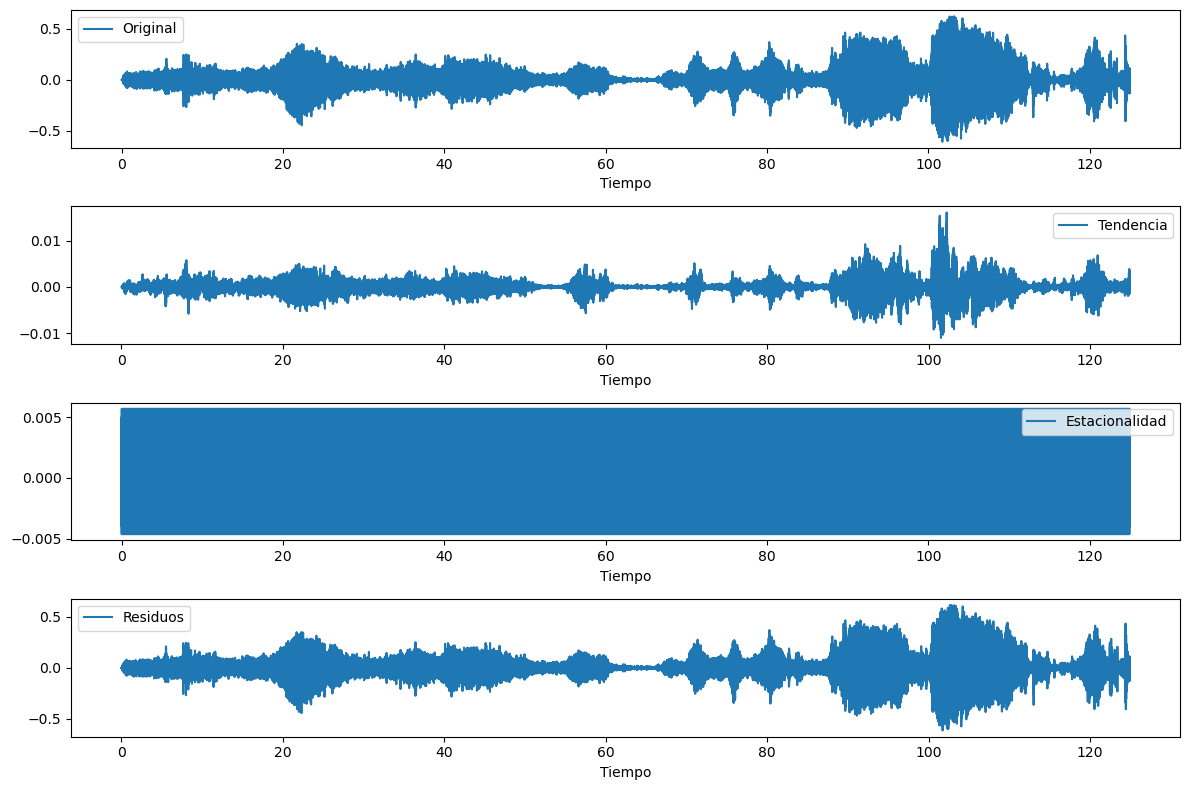

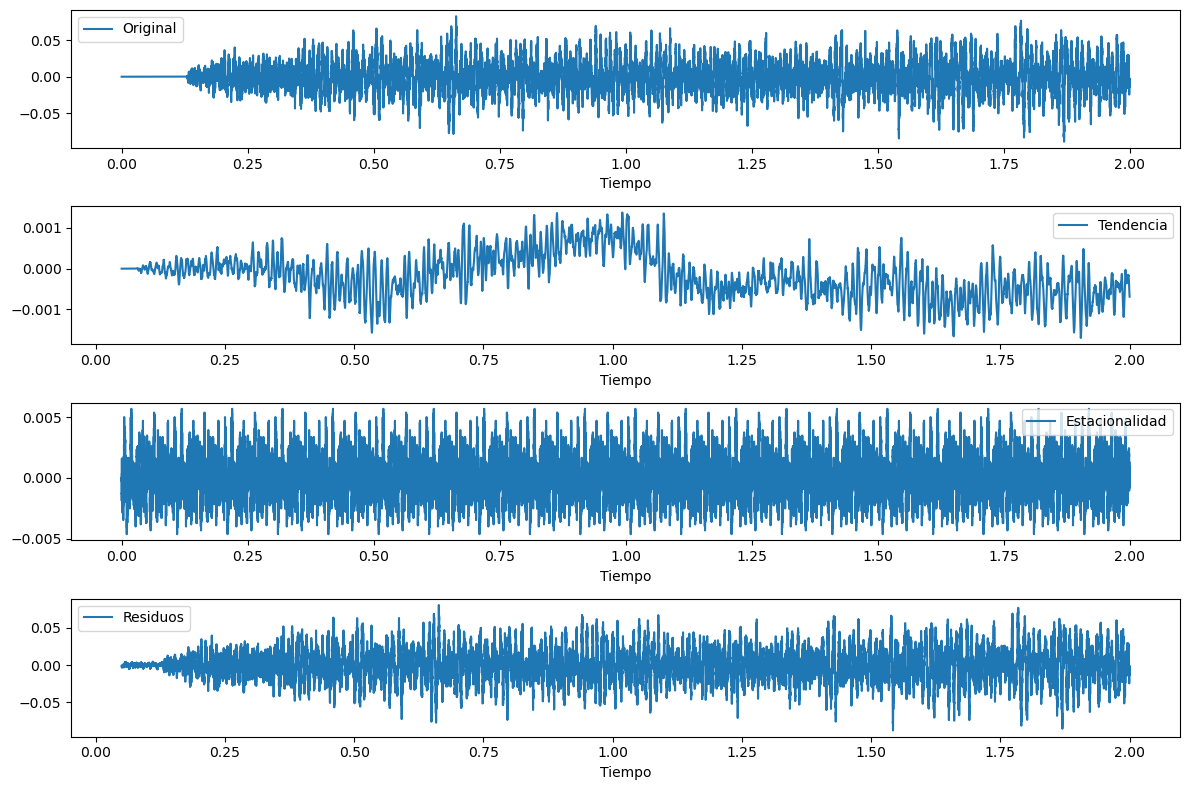

Tasa de muestreo para audio2.mp3: 22050 Hz
Graficas para audio2.mp3:


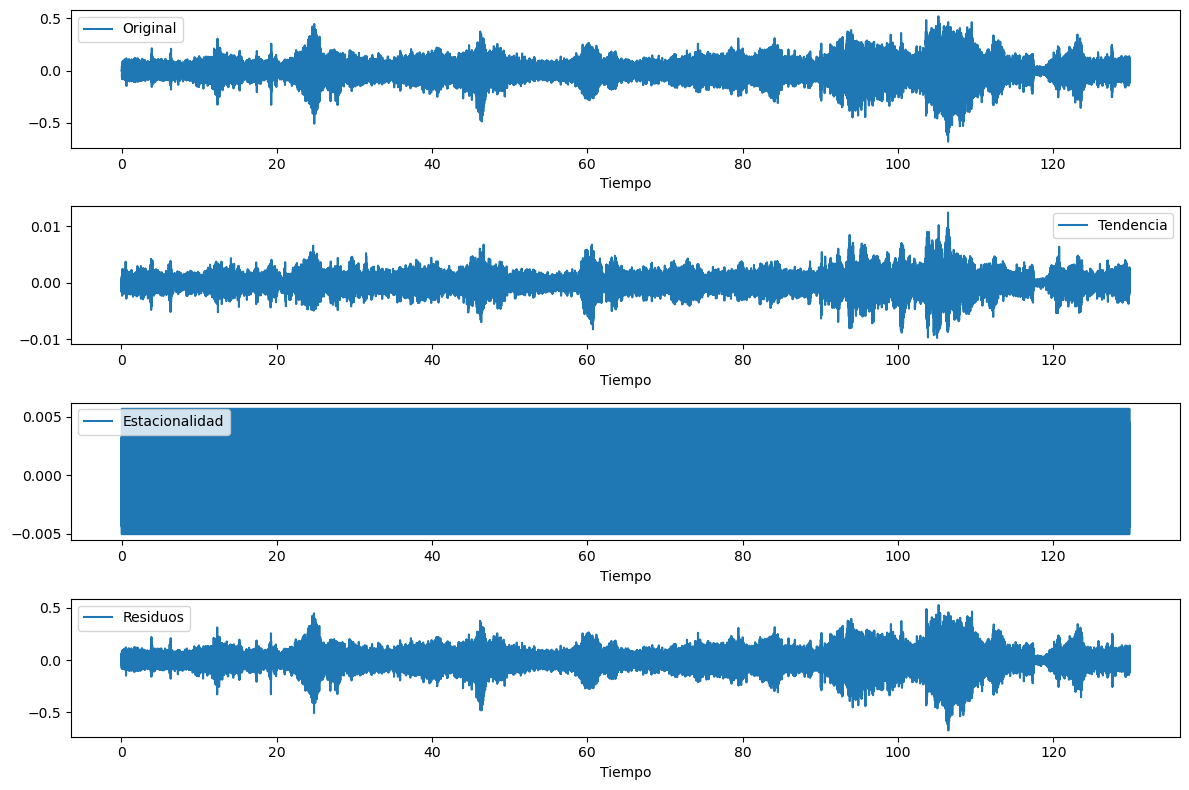

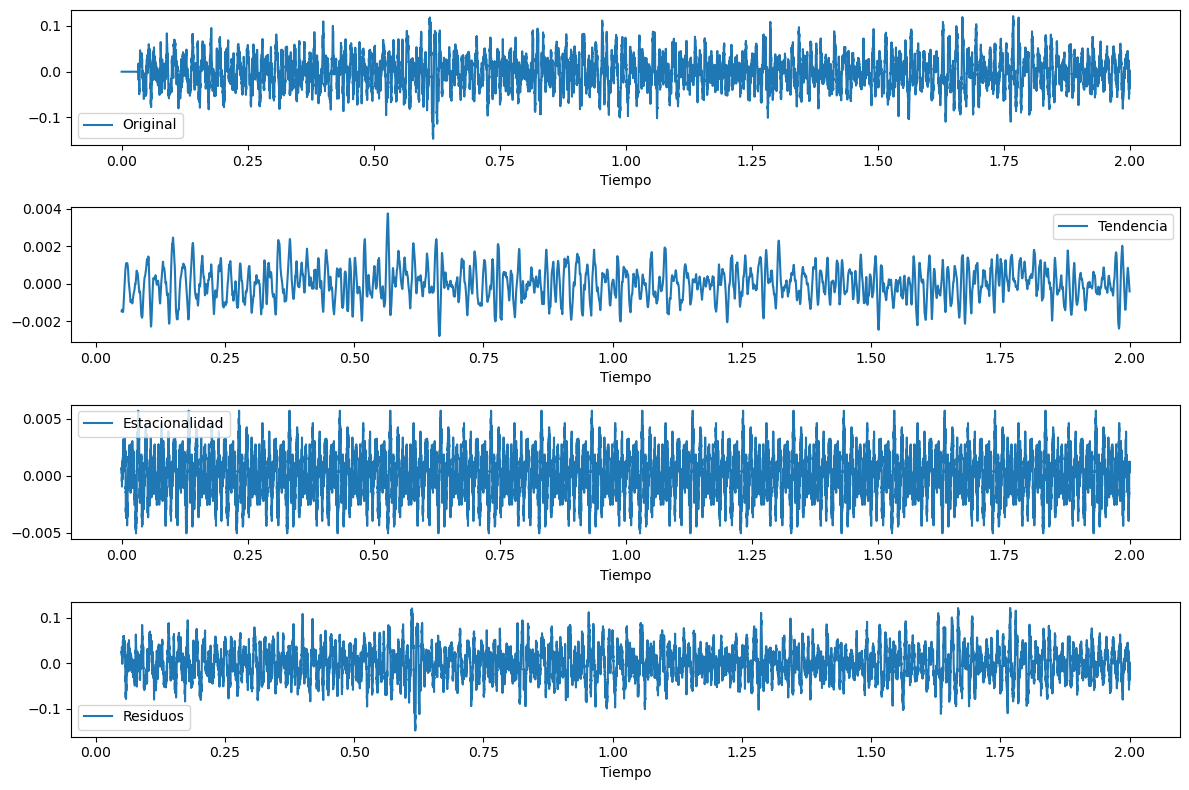

In [14]:
import statsmodels.api as sm
import numpy as np

# Función para graficar las componentes de audio
def plot_audio_components(audio_series, trend, seasonal, residual, sr, interval_duration):
    # Generar arreglo de tiempo en segundos
    time = np.arange(len(audio_series)) / sr

    # Graficar las componentes
    plt.figure(figsize=(12, 8))

    plt.subplot(4, 1, 1)
    plt.plot(time, audio_series, label='Original')
    plt.xlabel('Tiempo')
    plt.legend()

    plt.subplot(4, 1, 2)
    plt.plot(time, trend, label='Tendencia')
    plt.xlabel('Tiempo')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(time, seasonal, label='Estacionalidad')
    plt.xlabel('Tiempo')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.plot(time, residual, label='Residuos')
    plt.xlabel('Tiempo')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Graficar las componentes para el intervalo de tiempo de 2 segundos
    plt.figure(figsize=(12, 8))

    interval_samples = int(interval_duration * sr)  # Número de muestras en el intervalo

    plt.subplot(4, 1, 1)
    plt.plot(time[:interval_samples], audio_series[:interval_samples], label='Original')
    plt.xlabel('Tiempo')
    plt.legend()

    plt.subplot(4, 1, 2)
    plt.plot(time[:interval_samples], trend[:interval_samples], label='Tendencia')
    plt.xlabel('Tiempo')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(time[:interval_samples], seasonal[:interval_samples], label='Estacionalidad')
    plt.xlabel('Tiempo')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.plot(time[:interval_samples], residual[:interval_samples], label='Residuos')
    plt.xlabel('Tiempo')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Iterar sobre los archivos de audio
for i, audio_path in enumerate(audio_paths):
    # Cargar el archivo de audio
    y, sr = librosa.load(audio_path)

    # Realizar la descomposición
    decomposition = sm.tsa.seasonal_decompose(y, model='additive', period=int(sr/10))  # Se usa sr/10 como periodo, puedes ajustarlo según sea necesario

    # Obtener las componentes
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Imprimir la tasa de muestreo
    print(f"Tasa de muestreo para {audio_path}: {sr} Hz")

    # Graficar las componentes para todo el audio y para un intervalo de 2 segundos
    print(f"Graficas para {audio_path}:")
    plot_audio_components(y, trend, seasonal, residual, sr, interval_duration=2)


Espectro de Frecuencias para audio1.mp3:


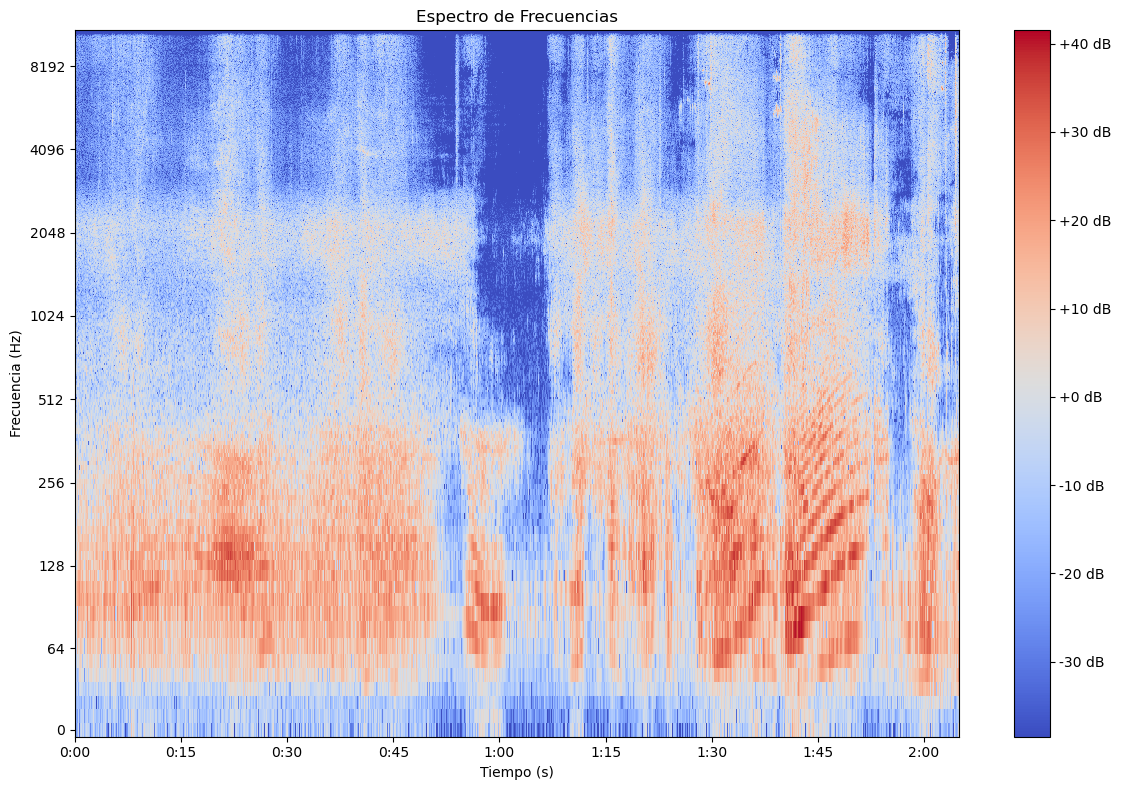

Espectro de Frecuencias para audio2.mp3:


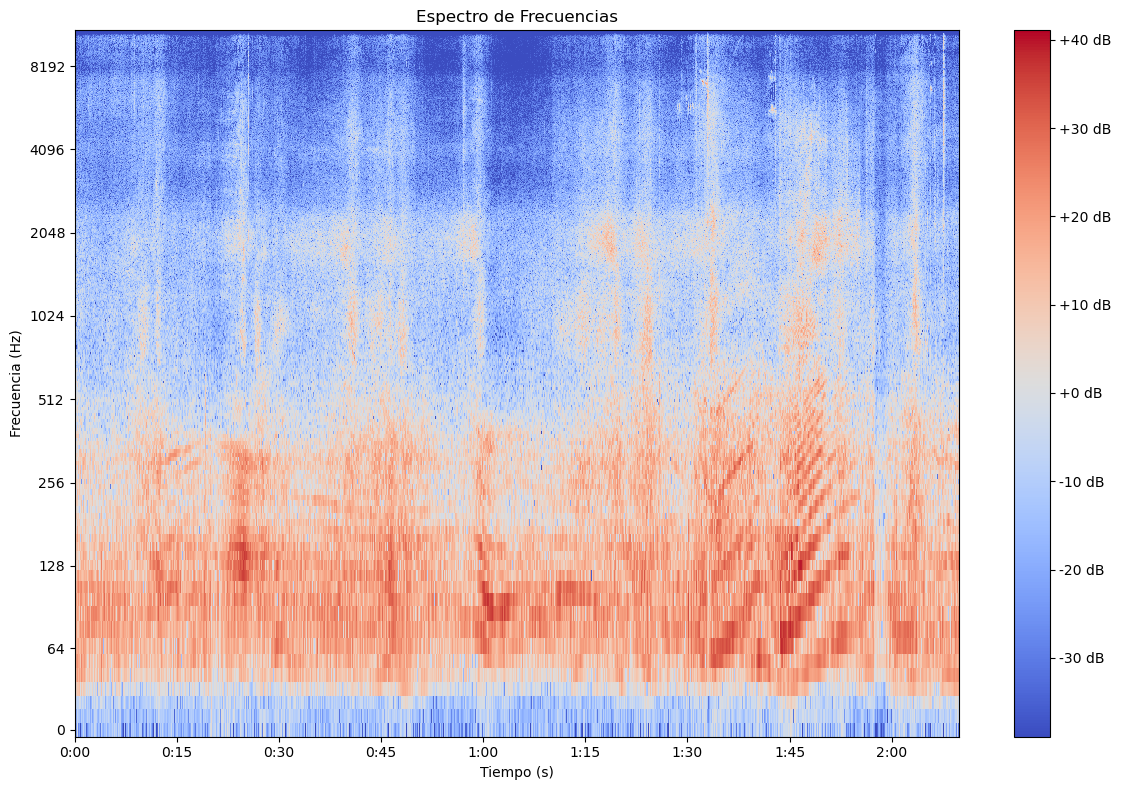

In [15]:
# Función para graficar el espectro de frecuencias
def plot_frequency_spectrum(audio_path):
    # Cargar el archivo de audio
    y, sr = librosa.load(audio_path)

    # Calcular la magnitud de la transformada de Fourier de la señal
    D = librosa.stft(y)
    magnitude = librosa.amplitude_to_db(abs(D))

    # Graficar el espectro de frecuencias
    plt.figure(figsize=(12, 8))
    librosa.display.specshow(magnitude, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Espectro de Frecuencias')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Frecuencia (Hz)')
    plt.tight_layout()
    plt.show()

# Iterar sobre los archivos de audio y graficar el espectro de frecuencias
for audio_path in audio_paths:
    print(f"Espectro de Frecuencias para {audio_path}:")
    plot_frequency_spectrum(audio_path)


Espectro de Frecuencias para audio1.mp3:


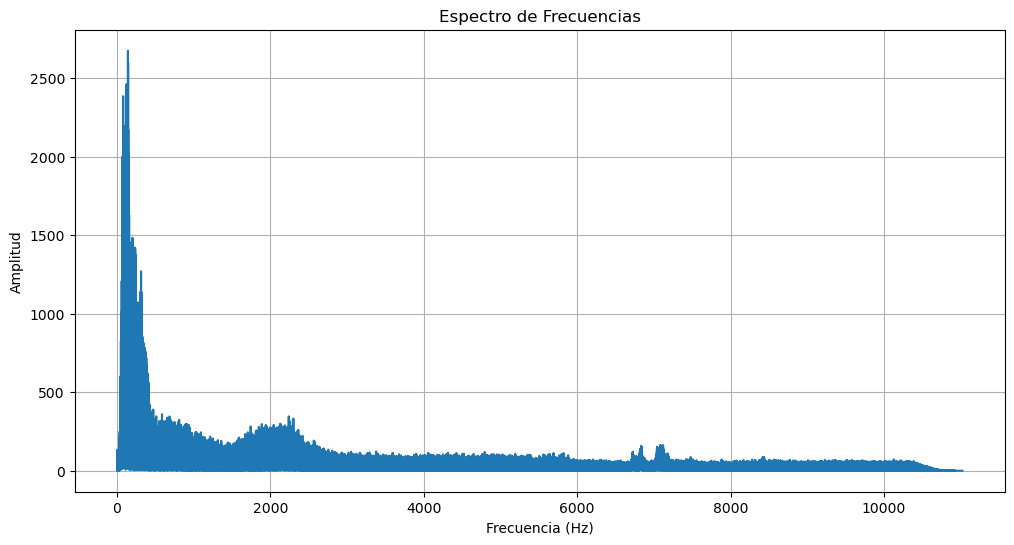

Espectro de Frecuencias para audio2.mp3:


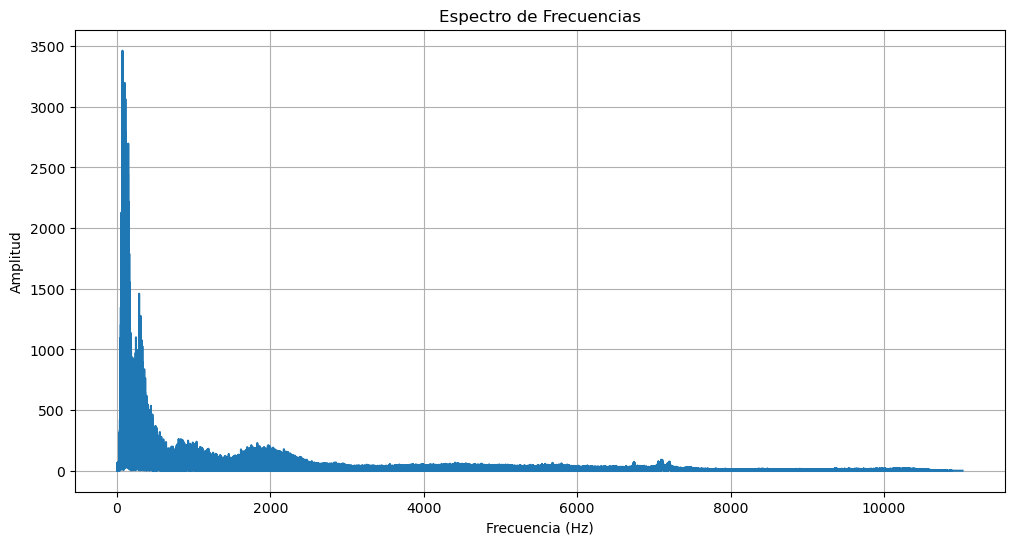

In [16]:
# Función para graficar el espectro de frecuencias
def plot_frequency_spectrum(audio_path):
    # Cargar el archivo de audio
    y, sr = librosa.load(audio_path)

    # Calcular la transformada de Fourier de la señal
    fft = np.fft.fft(y)

    # Calcular las frecuencias correspondientes
    freqs = np.fft.fftfreq(len(fft), 1/sr)

    # Graficar el espectro de frecuencias
    plt.figure(figsize=(12, 6))
    plt.plot(freqs[:len(freqs)//2], np.abs(fft)[:len(freqs)//2])
    plt.title('Espectro de Frecuencias')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.grid(True)
    plt.show()

# Iterar sobre los archivos de audio y graficar el espectro de frecuencias
for audio_path in audio_paths:
    print(f"Espectro de Frecuencias para {audio_path}:")
    plot_frequency_spectrum(audio_path)


In [22]:
print(audio_paths)

['audio1.mp3', 'audio2.mp3']


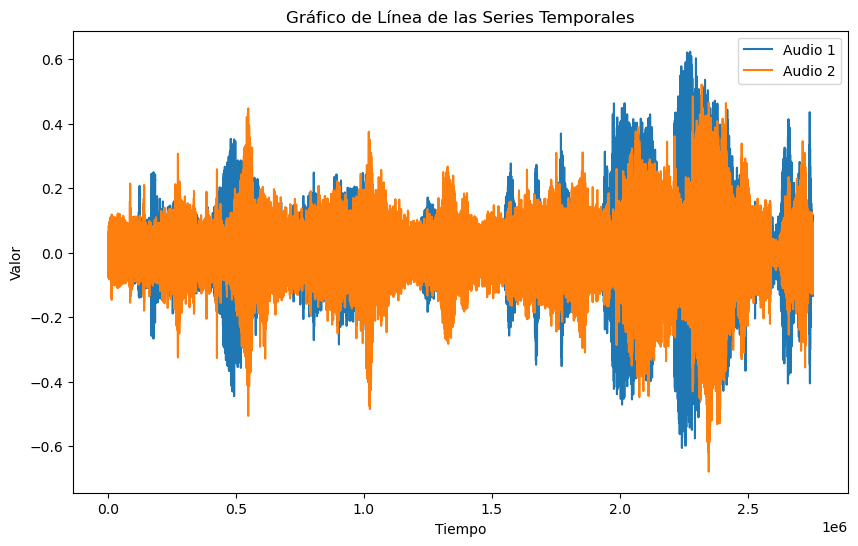

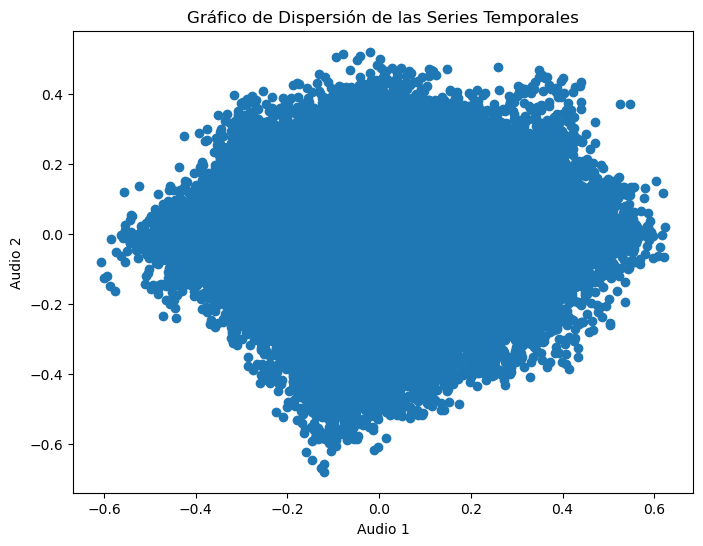

Coeficiente de correlación entre las dos series temporales: 0.006888228165718446


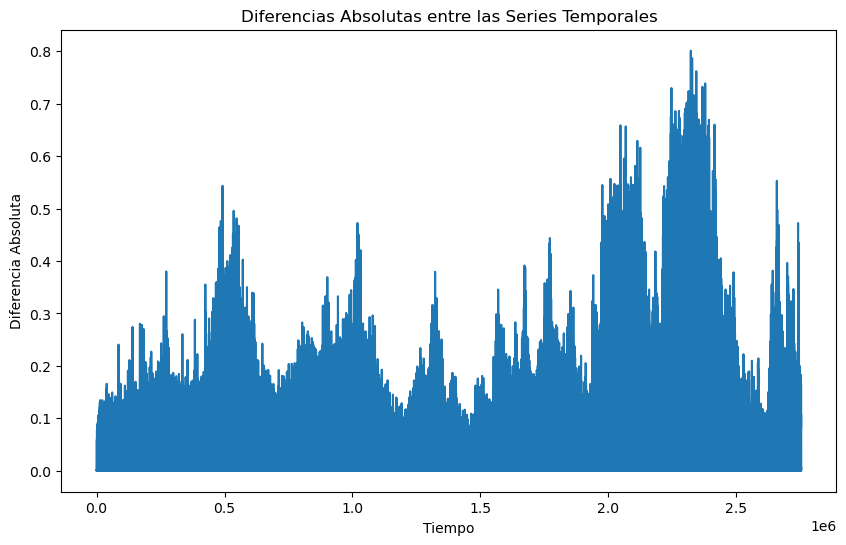

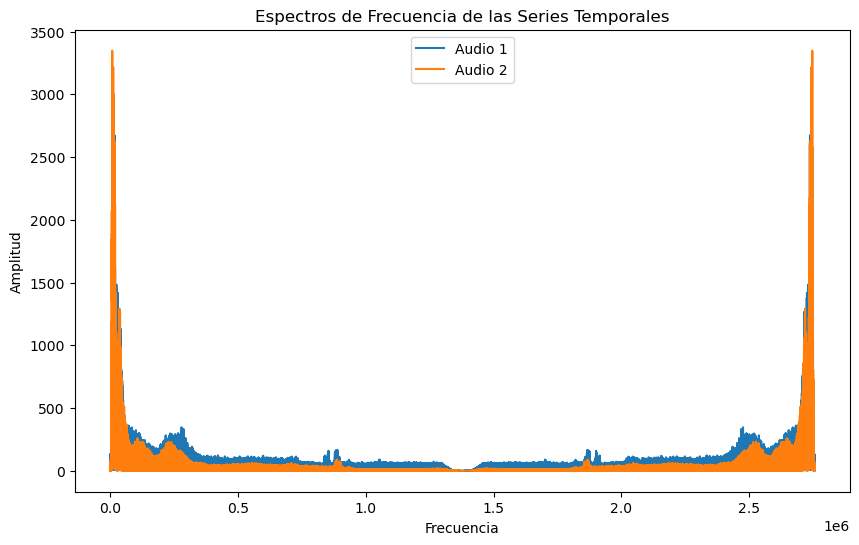

Distancia Euclidiana entre las dos series temporales: 153.26040649414062


In [24]:
from scipy.stats import pearsonr

audio1_series , sr1 = librosa.load(audio_paths[0])
audio2_series , sr2 = librosa.load(audio_paths[1]) 

# Asegurarse de que las series temporales tengan la misma longitud
min_length = min(len(audio1_series), len(audio2_series))
audio1_series = audio1_series[:min_length]
audio2_series = audio2_series[:min_length]

# 1. Gráficos de línea
plt.figure(figsize=(10, 6))
plt.plot(audio1_series, label='Audio 1')
plt.plot(audio2_series, label='Audio 2')
plt.title('Gráfico de Línea de las Series Temporales')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

# 2. Gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(audio1_series, audio2_series)
plt.title('Gráfico de Dispersión de las Series Temporales')
plt.xlabel('Audio 1')
plt.ylabel('Audio 2')
plt.show()

# 3. Correlación
correlation_coef, _ = pearsonr(audio1_series, audio2_series)
print(f"Coeficiente de correlación entre las dos series temporales: {correlation_coef}")

# 4. Diferencias absolutas
absolute_differences = np.abs(audio1_series - audio2_series)
plt.figure(figsize=(10, 6))
plt.plot(absolute_differences)
plt.title('Diferencias Absolutas entre las Series Temporales')
plt.xlabel('Tiempo')
plt.ylabel('Diferencia Absoluta')
plt.show()

# 5. Análisis de Fourier
fft_audio1 = np.fft.fft(audio1_series)
fft_audio2 = np.fft.fft(audio2_series)

plt.figure(figsize=(10, 6))
plt.plot(np.abs(fft_audio1), label='Audio 1')
plt.plot(np.abs(fft_audio2), label='Audio 2')
plt.title('Espectros de Frecuencia de las Series Temporales')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

# 6. Medidas de distancia
euclidean_distance = np.linalg.norm(audio1_series - audio2_series)
print(f"Distancia Euclidiana entre las dos series temporales: {euclidean_distance}")

# 7. Visualización de tendencias y estacionalidad
# Puedes usar técnicas de descomposición de series temporales aquí, como la descomposición estacional.
# Sin embargo, esto requeriría implementar la descomposición en sí misma, lo cual es más complejo.